In [2]:
import csv 
 
f = open('card.csv')         # 파일 오픈
data = csv.reader(f)         # 파일 읽기 reader
next(data)                   # 파일 헤더 건너뛰기 
data = list(data)            # 파일 리스트로 바꾸기
data[0]

['2019-10-12 9:13',
 '1972753',
 '본',
 'S&',
 '185',
 '네이버파이낸셜(주)',
 '546800',
 '일시불(A)',
 '부분취소']

### 파일 열기 전에 파일 존재 여부 확인
- 학습모듈
    - os.listdir
    - glob
- 파일이 있는 경로에 내가 사용하고자 하는 파일명이 있는가를 체크
    - 경로 내의 파일리스트를 가져와야 함 : fileList=os.listdir('.')
    - 가져온 리스트에 검색하는 파일명이 있는가 : fileList.index('card.csv')
        - 인덱스 명령은 위치값을 가져옴 (0, 1, 2, 3, ...)
        - 같은 자료가 없으면 그 어떤 값도 가져오질 못해서 에러가 난다.
            - try ~ except로 해결

In [3]:
import os
from glob import glob
os.listdir('.') # 경로없이
glob('*')  # 경로없이
glob('./*')  # 경로포함

['.\\card.csv',
 '.\\img',
 '.\\pygame.ipynb',
 '.\\튜플과 딕셔너리.ipynb',
 '.\\파일 열기 및 카드 데이터분석.ipynb']

In [4]:
findFile = 'card.csv'
fileList = os.listdir('.')

# if findFile in os.listdir('.'):
#     print(findFile, '있음')
# else:
#     print(findFile, '없음')

try:
    fileList.index(findFile)
    print(findFile, '파일 있음')
except:
    print('파일 없음')

card.csv 파일 있음


In [5]:
import csv, os

def fileCheck(findFile):
    try:
        fileList.index(findFile)
        return True
    except:
        return False


findFile = 'card.csv'
fileList = os.listdir('.')
if fileCheck(findFile):
    f = open('card.csv')         # 파일 오픈
    data = csv.reader(f)         # 파일 읽기 reader
    title=next(data)                   # 파일 헤더 건너뛰기
    data = list(data)            # 파일 리스트로 바꾸기
    print(data)

else:
    print('파일 없음')

[['2019-10-12 9:13', '1972753', '본', 'S&', '185', '네이버파이낸셜(주)', '546800', '일시불(A)', '부분취소'], ['2019-10-12 11:56', '3399357', '본', 'S&', '185', 'GS  샵', '60440', '일시불(A)', '전표매입'], ['2019-10-13 9:16', '12621902', '본', 'S&', '185', 'G마켓', '91520', 'P(A)', '전표매입'], ['2019-10-14 1:32', '20726947', '본', 'S&', '185', '11번가', '89810', '일시불(A)', '전표매입'], ['2019-10-14 7:06', '21234320', '본', 'S&', '185', '네이버파이낸셜(주)', '33600', '일시불(A)', '전표매입'], ['2019-10-15 23:32', '42229559', '본', 'S&', '185', '네이버파이낸셜(주)', '309600', '일시불(A)', '부분취소'], ['2019-10-16 8:00', '43433092', '본', 'S&', '185', 'SSG.COM', '61983', '일시불(A)', '부분취소'], ['2019-10-16 16:04', '48341209', '본', 'S&', '185', '(주)에이랜드 타임스퀘어', '31600', '일시불', '전표매입'], ['2019-10-17 1:13', '3495922', '본', 'S&', '185', '(주)어패럴컴퍼니', '97000', '일시불(A)', '부분취소'], ['2019-10-17 20:19', '12252560', '본', 'S&', '185', '(주)곱', '96000', '일시불', '전표매입'], ['2019-10-17 20:28', '12336385', '본', 'S&', '185', '카카오택시(선승인)', '4200', '일시불', '승인취소'], ['2019-10-17 20:35',

In [6]:
title.index('이용금액')

6

In [7]:
# ['2019-10-12 9:13', '1972753', '본', 'S&', '185', '네이버파이낸셜(주)', '546800', '일시불(A)', '부분취소']

num=title.index('이용금액')
이용금액 = [int(row[num]) for row in data]
이용금액[:5], 이용금액[-5:]

([546800, 60440, 91520, 89810, 33600], [16800, 51502, 9200, 15000, 16640])

In [8]:
print('전체합: {} / 최소 {} / 최대 {} / 평균 {}' .format(sum(이용금액), min(이용금액), max(이용금액), sum(이용금액)//len(이용금액)))

전체합: 11419825 / 최소 100 / 최대 546800 / 평균 48389


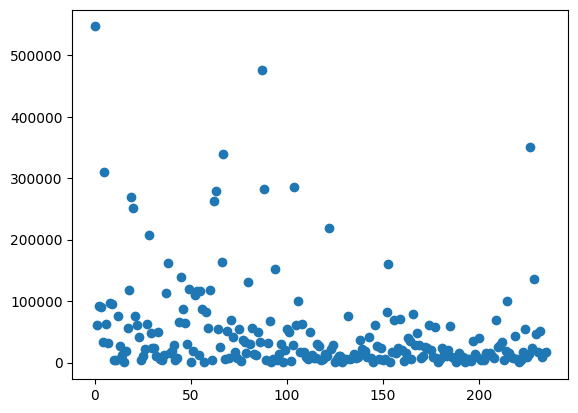

In [9]:
import matplotlib.pyplot as plt
plt.plot(이용금액,'o')

In [33]:
title
매입상태_num=title.index('매입상태')
매입상태_num

8

In [23]:
title

전표구분 = [row[매입상태_num] for row in data]
전표리스트=set(전표구분)
전표리스트

{'매출취소', '부분취소', '승인취소', '전표매입'}

Text(0.5, 1.0, '전표매입한 이용금액')

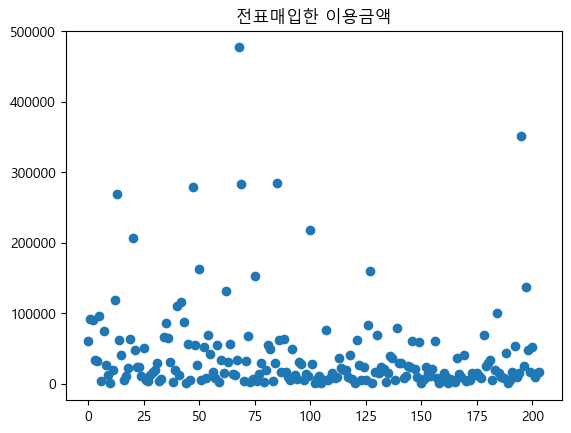

In [39]:
# 전표매입에 관련된 이용금액만

plt.rcParams['font.family'] = 'Malgun Gothic'

def 매입상태리스트(status_list, status):
    for row in data:
        if row[매입상태_num]==status:
            status_list.append(int(row[num]))


전표매입리스트=[]
매입상태리스트(전표매입리스트, '전표매입')

plt.plot(전표매입리스트,'o')  # 점단위로 데이터를 시각화
plt.title('전표매입한 이용금액')  # 제목 달기

In [40]:
매출취소리스트=[]
매입상태리스트(매출취소리스트, '매출취소')

승인취소리스트=[]
매입상태리스트(승인취소리스트, '승인취소')


전표구분딕셔너리 = {'전표매입이용금액':전표매입리스트,
            '매출취소이용금액':매출취소리스트,
            '승인취소이용금액':승인취소리스트}

전표구분딕셔너리['매출취소이용금액']

[112845, 161598, 139500, 81540, 118400, 339125, 50000, 71500]